## K近邻分类练习题

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import mglearn

在这个练习中，我们使用电信企业的客户流失数据集，Orange_Telecom_Churn_Data.csv（存放在当前目录下）。我们先读入数据集，做一些数据预处理，然后使用K近邻模型根据用户的特点来预测其是否会流失。

### 第一步：
* 将数据集读入变量data中，并查看其前5行。
* 去除其中的“state"，"area_code"和"phone_number"三列。

In [2]:
# 将数据集读入变量data中，并查看其前5行
data = pd.read_csv("D:\JupyterSpace\AI&ML_assignment\Orange_Telecom_Churn_Data.csv")
data.head(5)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# 去除“state"，"area_code"和"phone_number"三列
data = data.drop(['state','area_code','phone_number'], axis=1)
data.head(5)
print(data.shape)

(5000, 18)


### 第二步：
* 有些列的值是分类数据，如'intl_plan', 'voice_mail_plan', 'churned'这三列，需要把它们转换成数值数据。

In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])
data.head(5)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 第三步：
* 将“churned”列作为要预测的目标列数据，赋给y_data；除“churned”列之外的所有其他列的数据作为特征列数据，赋给X_data。
* 使用课件中提到的某种数据缩放方法（scaling method）来缩放X_data。

In [5]:
# 生成X_data和y_data
y_data = data["churned"]
X_data = data.drop(["churned"], axis=1)
print(X_data.shape)
print(y_data.shape)

(5000, 17)
(5000,)


In [6]:
# 缩放X_data
from sklearn.preprocessing import StandardScaler

StdSc = StandardScaler()
X_scaled = StdSc.fit_transform(X_data)
print(X_scaled.shape)


(5000, 17)


### 第四步：
* 创建一个k=3的K近邻模型，并拟合X_data和y_data。

In [7]:
# 创建一个3NN模型，并训练
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y_data)

KNeighborsClassifier(n_neighbors=3)

### 第五步：
* 用上一步训练好的K近邻模型预测相同的数据集，即X_data，并评测预测结果的精度。

In [8]:
# 预测并评价
y_pred = knn.predict(X_scaled)

from sklearn.metrics import accuracy_score

print('Accuracy:', float(accuracy_score(y_data, y_pred))*100, '%')

Accuracy: 93.96 %


### 第六步：
* 构建一个同样是`n_neighbors=3`的模型，但是用距离作为聚集K个近邻预测结果的权重。同样计算此模型在X_data上的预测精度。 
* 构建另一个K近邻模型：使用均匀分布的权重，但是将闵科夫斯基距离中的指数参数设为1(`p=1`)，即使用曼哈顿距离。

In [9]:
# n_neighbors=3, weights='distance'
knn_w = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_w.fit(X_scaled, y_data)

y_pred_w = knn_w.predict(X_scaled)

from sklearn.metrics import accuracy_score

print('Accuracy:', float(accuracy_score(y_data, y_pred_w))*100, '%')

Accuracy: 100.0 %


In [10]:
# n_neighbors=3, p=1
knn_mht = KNeighborsClassifier(n_neighbors=3, p=1)
knn_mht.fit(X_scaled, y_data)

y_pred_mht = knn_mht.predict(X_scaled)

from sklearn.metrics import accuracy_score

print('Accuracy:', float(accuracy_score(y_data, y_pred_mht))*100, '%')

Accuracy: 94.16 %


### 第七步：
* 将K值从1变化到20，训练20个不同的K近邻模型。权重使用均匀分布的权重（缺省的）。闵科夫斯基距离的指数参数(`p`)可以设为1或者2（只要一致即可）。将每个模型得到的精度和其`k`值存到一个列表或字典中。
* 将`accuracy`和`k`的关系绘成图表。当`k=1`时，你观察到了什么? 为什么?

In [11]:
neighbors_settings = range(1, 21)
accuracy = []

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_scaled, y_data)
    y_pred = clf.predict(X_scaled)
    accuracy.append(accuracy_score(y_data, y_pred))


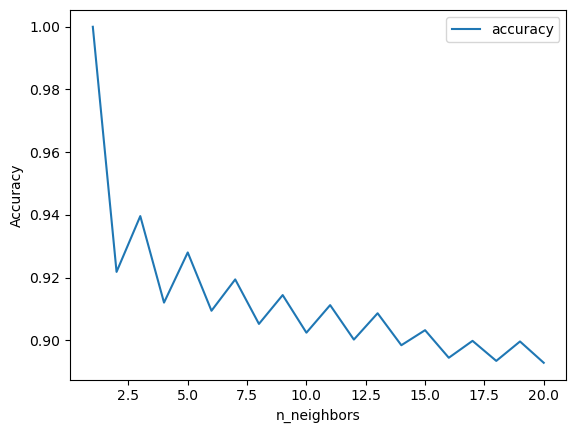

In [12]:
plt.plot(neighbors_settings, accuracy, label='accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()